# Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols

## Evaluating simple linear regressions on lemonade data with other features:

1. Create a dataframe from the csv at [link](https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv)

In [2]:
lemonade = pd.read_csv('lemonade.csv')

In [3]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [4]:
lemonade.nunique()

Date           365
Day              7
Temperature    176
Rainfall        34
Flyers          62
Price            1
Sales           35
dtype: int64

In [5]:
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


2. Make a baseline for predicting `sales`. (The mean is a good baseline)

In [6]:
baseline = lemonade.Sales.mean()
baseline

25.323287671232876

3. Create a new dataframe to hold residuals.

In [7]:
evaluate = pd.DataFrame()

4. Calculate the baseline residuals.

In [17]:
evaluate['y'] = lemonade.Sales
evaluate['x'] = lemonade.Flyers
evaluate['baseline'] = baseline
evaluate['baseline_residual'] = evaluate.baseline - evaluate.y

5. Use `ols` from `statsmodels` to create a simple linear regression (1 independent variable, 1 dependent variable) to predict `sales` using `flyers`.

In [18]:
model = ols('Sales ~ Flyers', data=lemonade).fit()

6. Use the `.predict` method from `ols` to produce all of our predictions. Add these predictions to the data

In [19]:
evaluate['yhat'] = model.predict()

7. Calculate that model's residuals.

In [20]:
evaluate['model_residual'] = evaluate.yhat - evaluate.y

In [21]:
evaluate.head()

,y,x,baseline,baseline_residual,yhat,model_residual
0,10,15,25.323288,15.323288,14.673754,4.673754
1,13,15,25.323288,12.323288,14.673754,1.673754
2,15,27,25.323288,10.323288,19.727926,4.727926
3,17,28,25.323288,8.323288,20.149107,3.149107
4,18,33,25.323288,7.323288,22.255013,4.255013


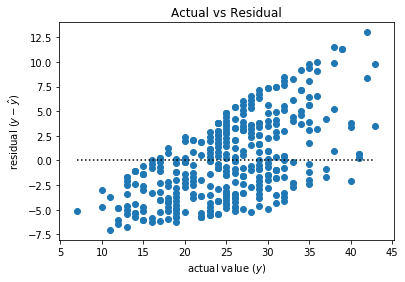

In [22]:
plot_residuals(evaluate.y, evaluate.yhat)

8. Evaluate that model's performance and answer if the model is significant.

In [23]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

Baseline SSE 17297.85205479452
Model SSE 6083.326244705024
Our model beats the baseline
It makes sense to evaluate this model more deeply.


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(evaluate.y, evaluate.yhat)
rmse = sqrt(mse)

print("SSE is", model_sse, " which is the sum sf squared errors")
print("MSE is", mse, " which is the average squared error")
print("RMSE is", rmse, " which is the square root of the MSE")

SSE is 6083.326244705024  which is the sum sf squared errors
MSE is 16.666647245767187  which is the average squared error
RMSE is 4.082480526073233  which is the square root of the MSE


9. Evaluate that model's performance and answer if the feature is significant.

In [25]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

f_pval < .05

R-squared =  0.648
p-value for model significance =  2.193718738113383e-84


True

## Repetition Improves Performance!
- In the next section of your notebook, perform the steps above with the `rainfall` column as the model's feature. Does this model beat the baseline? Would you prefer the rainfall model over the `flyers` model?

In [26]:
# set baseline (mean of target variable)
baseline # =lemonade.Sales.mean()

25.323287671232876

In [27]:
# build linear model
# ols("target ~ feature", df).fit()

from statsmodels.formula.api import ols

model2 = ols('Sales ~ Rainfall', lemonade).fit()

# calculate residuals - `rainfall`
evaluate2 = pd.DataFrame()
evaluate2['x'] = lemonade.Rainfall
evaluate2['y'] = lemonade.Sales
evaluate2['baseline'] = baseline
evaluate2['yhat'] = model2.predict()
evaluate2['baseline_residual'] = evaluate2.baseline - evaluate2.y
evaluate2['model_residual'] = evaluate2.yhat - evaluate2.y

evaluate2.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,2.00,10,25.323288,-1.599602,15.323288,-11.599602
1,1.33,13,25.323288,13.773142,12.323288,0.773142
2,1.33,15,25.323288,13.773142,10.323288,-1.226858
3,1.05,17,25.323288,20.197573,8.323288,3.197573
4,1.00,18,25.323288,21.344793,7.323288,3.344793


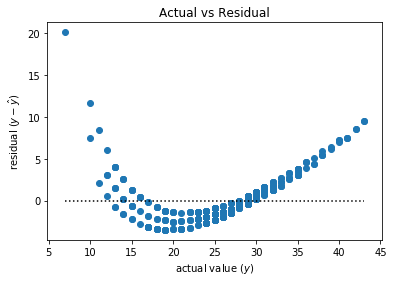

In [28]:
plot_residuals(evaluate2.y, evaluate2.yhat)

In [29]:
# compare SSE between baseline and model
baseline_sse2 = (evaluate2.baseline_residual**2).sum()
model_sse2 = (evaluate2.model_residual**2).sum()

if model_sse2 < baseline_sse2:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse2)
print("Model 2 SSE ", model_sse2)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model 2 SSE  2998.2371310300655


In [30]:
# calculate other metrics, MSE, RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse2 = mean_squared_error(evaluate2.y, evaluate2.yhat)
rmse2 = sqrt(mse2)

print("SSE 2 is", model_sse2, " which is the sum sf squared errors")
print("MSE 2 is", mse2, " which is the average squared error")
print("RMSE 2 is", rmse2, " which is the square root of the MSE")

SSE 2 is 2998.2371310300655  which is the sum sf squared errors
MSE 2 is 8.21434830419196  which is the average squared error
RMSE 2 is 2.866068440249109  which is the square root of the MSE


In [31]:
# Find correlation, then p-value for F-Test (for significance of model and feature)
r2_2 = model2.rsquared
print('R-squared = ', round(r2_2,3))

f_pval2 = model2.f_pvalue
print("p-value for model significance = ", f_pval2)

f_pval2 < .05

R-squared =  0.827
p-value for model significance =  3.2988846597381e-140


True

In [32]:
# WHICH MODEL IS BEST? 
print('Baseline: ', baseline_sse)
print('Flyers Model: ', model_sse)
print('*Rainfall Model: ', model_sse2)

Baseline:  17297.85205479452
Flyers Model:  6083.326244705024
*Rainfall Model:  2998.2371310300655


- In the next section of your notebook, perform the steps above with the `log_rainfall` column as the model's feature. Does this model beat the baseline? Would you prefer the `log_rainfall` model over the `flyers` model? Would you prefer the model built with `log_rainfall` over the rainfall model from before?

In [33]:
lemonade['log_rainfall'] = np.log(lemonade.Rainfall)
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,log_rainfall
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.693147
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.285179
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.285179
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.048790
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.000000


In [34]:
# set baseline (mean of target variable)
baseline # =lemonade.Sales.mean()

25.323287671232876

In [35]:
# build linear model
# ols("target ~ feature", df).fit()

from statsmodels.formula.api import ols

model3 = ols('Sales ~ log_rainfall', lemonade).fit()

# calculate residuals - `log_rainfall`
evaluate3 = pd.DataFrame()
evaluate3['x'] = lemonade.log_rainfall
evaluate3['y'] = lemonade.Sales
evaluate3['baseline'] = baseline
evaluate3['yhat'] = model3.predict()
evaluate3['baseline_residual'] = evaluate3.baseline - evaluate3.y
evaluate3['model_residual'] = evaluate3.yhat - evaluate3.y

evaluate3.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,0.693147,10,25.323288,3.688573,15.323288,-6.311427
1,0.285179,13,25.323288,13.198359,12.323288,0.198359
2,0.285179,15,25.323288,13.198359,10.323288,-1.801641
3,0.048790,17,25.323288,18.708608,8.323288,1.708608
4,0.000000,18,25.323288,19.845912,7.323288,1.845912


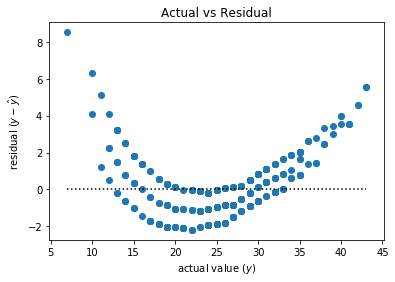

In [36]:
plot_residuals(evaluate3.y, evaluate3.yhat)

In [37]:
# compare SSE between baseline and model
baseline_sse3 = (evaluate3.baseline_residual**2).sum()
model_sse3 = (evaluate3.model_residual**2).sum()

if model_sse3 < baseline_sse3:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse3)
print("Model 3 SSE ", model_sse3)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model 3 SSE  952.3253474293448


In [38]:
# calculate other metrics, MSE, RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse3 = mean_squared_error(evaluate3.y, evaluate3.yhat)
rmse3 = sqrt(mse3)

print("SSE 3 is", model_sse3, " which is the sum sf squared errors")
print("MSE 3 is", mse3, " which is the average squared error")
print("RMSE 3 is", rmse3, " which is the square root of the MSE")

SSE 3 is 952.3253474293448  which is the sum sf squared errors
MSE 3 is 2.6091105409023143  which is the average squared error
RMSE 3 is 1.6152741380033033  which is the square root of the MSE


In [39]:
# Find correlation, then p-value for F-Test (for significance of model and feature)
r2_3 = model3.rsquared
print('R-squared = ', round(r2_3,3))

f_pval3 = model3.f_pvalue
print("p-value for model significance = ", f_pval3)

f_pval3 < .05

R-squared =  0.945
p-value for model significance =  1.2242624097795882e-230


True

In [40]:
# WHICH MODEL IS BEST? (based on SSE)
print('Baseline: ', baseline_sse)
print('Flyers Model: ', model_sse)
print('Rainfall Model: ', model_sse2)
print('*log_rainfall Model: ', model_sse3)

Baseline:  17297.85205479452
Flyers Model:  6083.326244705024
Rainfall Model:  2998.2371310300655
*log_rainfall Model:  952.3253474293448


- In the next section of your notebook, perform the steps above with the `temperature` column as the model's only feature. Does this model beat the baseline? Would you prefer the `rainfall`, `log_rainfall`, or the `flyers` model?

In [42]:
# build linear model
# ols("target ~ feature", df).fit()

from statsmodels.formula.api import ols

model4 = ols('Sales ~ Temperature', lemonade).fit()

# calculate residuals - `temperature`
evaluate4 = pd.DataFrame()
evaluate4['x'] = lemonade.Temperature
evaluate4['y'] = lemonade.Sales
evaluate4['baseline'] = baseline
evaluate4['yhat'] = model4.predict()
evaluate4['baseline_residual'] = evaluate4.baseline - evaluate4.y
evaluate4['model_residual'] = evaluate4.yhat - evaluate4.y

evaluate4.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,27.0,10,25.323288,11.112301,15.323288,1.112301
1,28.9,13,25.323288,11.912772,12.323288,-1.087228
2,34.5,15,25.323288,14.272055,10.323288,-0.727945
3,44.1,17,25.323288,18.316540,8.323288,1.316540
4,42.4,18,25.323288,17.600329,7.323288,-0.399671


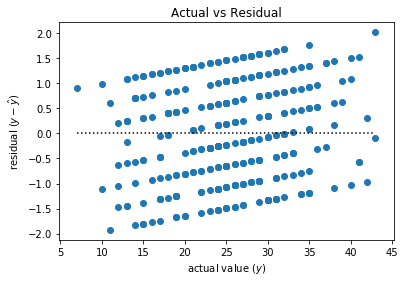

In [43]:
plot_residuals(evaluate4.y, evaluate4.yhat)

In [44]:
# compare SSE between baseline and model
baseline_sse4 = (evaluate4.baseline_residual**2).sum()
model_sse4 = (evaluate4.model_residual**2).sum()

if model_sse4 < baseline_sse4:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse4)
print("Model 4 SSE ", model_sse4)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model 4 SSE  349.977815203168


In [45]:
# calculate other metrics, MSE, RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

mse4 = mean_squared_error(evaluate4.y, evaluate4.yhat)
rmse4 = sqrt(mse4)

print("SSE 4 is", model_sse4, " which is the sum sf squared errors")
print("MSE 4 is", mse4, " which is the average squared error")
print("RMSE 4 is", rmse4, " which is the square root of the MSE")

SSE 4 is 349.977815203168  which is the sum sf squared errors
MSE 4 is 0.9588433293237479  which is the average squared error
RMSE 4 is 0.979205458177061  which is the square root of the MSE


In [46]:
# Find correlation, then p-value for F-Test (for significance of model and feature)
r2_4 = model4.rsquared
print('R-squared = ', round(r2_4,3))

f_pval4 = model4.f_pvalue
print("p-value for model significance = ", f_pval4)

f_pval4 < .05

R-squared =  0.98
p-value for model significance =  1.492364042585725e-309


True

In [47]:
# WHICH MODEL IS BEST? (based on SSE)
print('Baseline: ', baseline_sse)
print('Flyers Model: ', model_sse)
print('Rainfall Model: ', model_sse2)
print('log_rainfall Model: ', model_sse3)
print('*Temperature Model: ', model_sse4)

Baseline:  17297.85205479452
Flyers Model:  6083.326244705024
Rainfall Model:  2998.2371310300655
log_rainfall Model:  952.3253474293448
*Temperature Model:  349.977815203168


- Which of these 4 single regression models would you want to move forward with?

    **The Temperature Model**

## Tips dataset
1. Load the `tips` dataset from pydataset or seaborn

In [48]:
from pydataset import data
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on `total_bill`.

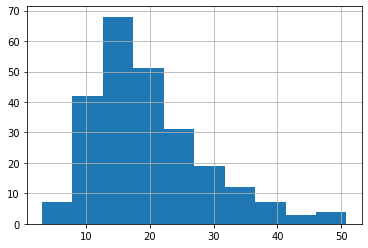

In [49]:
tips.total_bill.hist()

In [50]:
# Baseline
baseline = tips.total_bill.mean()

In [51]:
baseline

19.785942622950824

3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using `total_bill`. 

    Here is some sample code to get you started:

>from statsmodels.formula.api import ols
from pydataset import data

>df = data("tips")

>model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.x)

In [52]:
# Linear Regression Model
model_tips = ols('tip ~ total_bill', tips).fit()

# Calculate Residuals - "tip": Display as a DataFrame
eval_tips = pd.DataFrame()
eval_tips['x'] = tips.tip
eval_tips['y'] = tips.total_bill
eval_tips['baseline'] = baseline
eval_tips['yhat'] = model_tips.predict()
eval_tips['baseline_residual'] = eval_tips.baseline - eval_tips.y
eval_tips['model_residual'] = eval_tips.yhat - eval_tips.y

eval_tips.head()

,x,y,baseline,yhat,baseline_residual,model_residual
1,1.01,16.99,19.785943,2.704636,2.795943,-14.285364
2,1.66,10.34,19.785943,2.006223,9.445943,-8.333777
3,3.50,21.01,19.785943,3.126835,-1.224057,-17.883165
4,3.31,23.68,19.785943,3.407250,-3.894057,-20.272750
5,3.61,24.59,19.785943,3.502822,-4.804057,-21.087178


4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Sum of Squares
- taking the square of residuals makes larger errors more significant
- removes the negatives, only magnitude is needed

In [57]:
# Model SSE, MSE, and RMSE
mse_tips = mean_squared_error(eval_tips.y, eval_tips.yhat)
model_tips_sse = mse*len(tips)
rmse_tips = sqrt(mse_tips)

print("SSE is", model_tips_sse, " which is the sum of squared errors")
print("MSE is", mse_tips, " which is the average squared error")
print("RMSE is", rmse_tips, " which is the square root of the MSE")

SSE is 4066.6619279671936  which is the sum of squared errors
MSE is 345.04560309897226  which is the average squared error
RMSE is 18.575403174600876  which is the square root of the MSE


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [60]:
# Baseline SSE, MSE, and RMSE
mse_tips_base = mean_squared_error(eval_tips.y, eval_tips.baseline)
model_tips_base = mse_tips_base*len(tips)
rmse_tips_base = sqrt(mse_tips_base)

print("Baseline SSE is", base_tips_sse, " which is the sum of squared errors")
print("Baseline MSE is", mse_tips_base, " which is the average squared error")
print("Baseline RMSE is", rmse_tips_base, " which is the square root of the MSE")

Baseline SSE is 19258.46408319672  which is the sum of squared errors
Baseline MSE is 78.92813148851114  which is the average squared error
Baseline RMSE is 8.884150577771132  which is the square root of the MSE


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [59]:
# Baseline vs. Model SSE
base_tips_sse = (eval_tips.baseline_residual**2).sum()
model_tips_sse = (eval_tips.model_residual**2).sum()

print("Baseline SSE", base_tips_sse)
print("Model SSE ", model_tips_sse)

if model_tips_sse < base_tips_sse:
    print("Model is better than the Baseline")
    print("Evaluate this model.")
else:
    print("Baseline is better than the Model")

Baseline SSE 19258.46408319672
Model SSE  84191.12715614923
Baseline is better than the Model


7. What is the amount of variance explained in your model?

In [61]:
# Find correlation, then p-value for F-Test (for significance of model and feature)
r2_tips = model_tips.rsquared
print('R-squared = ', round(r2_tips,3))

f_pval_tips = model_tips.f_pvalue
print("p-value for model significance = ", f_pval_tips)

print('p-value < .05: ', f_pval_tips < .05)

R-squared =  0.457
p-value for model significance =  6.692470646863376e-34
p-value < .05:  True


8. Is your model significantly better than the baseline model?

    It's not better than baseline

9. Plot the residuals for the linear regression model that you made.

In [62]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

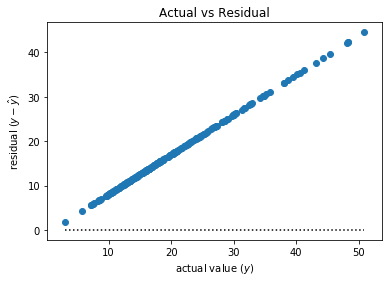

In [63]:
plot_residuals(eval_tips.y, eval_tips.yhat)

1. Create a file named `evaluate.py` that contains the following functions.

    - `plot_residuals(y, yhat)`: creates a residual plot
    - `regression_errors(y, yhat)`: returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
    - `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false
    - `model_significance(ols_model)`: that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the `rsquared` and `f_pvalue` properties from the ols model)

In [64]:
def regression_errors(actual, predicted):
    from sklearn.metrics import mean_squared_error
    from math import sqrt

    MSE = mean_squared_error(actual, predicted)
    SSE = MSE*len(actual)
    ESS = sum((predicted - actual.mean())**2)
    TSS = ESS + SSE
    RMSE = sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

In [65]:
regression_errors(tips.total_bill, model_tips.predict())

(84191.12715614923,
 68977.88486475579,
 153169.01202090504,
 345.04560309897226,
 18.575403174600876)

In [66]:
def baseline_mean_errors(actual):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    
    df = pd.DataFrame()
    df['y'] = actual
    df['baseline'] = actual.mean()
    
    MSE = mean_squared_error(actual, df.baseline)
    SSE = MSE*len(actual)
    RMSE = sqrt(MSE)
    return SSE, MSE, RMSE

In [67]:
baseline_mean_errors(tips.total_bill)

(19258.46408319672, 78.92813148851114, 8.884150577771132)

In [68]:
def better_than_baseline(actual, predicted):
    df = pd.DataFrame()
    df['y'] = actual
    df['baseline'] = actual.mean()
    
    baseline_sse = ((df.baseline - actual)**2).sum()
    model_sse = ((predicted - actual)**2).sum()

    if model_sse < baseline_sse:
        return True
    else:
        return False

In [69]:
better_than_baseline(lemonade.Sales, model4.predict())

True

In [70]:
def model_significance(ols_model):
    r2 = ols_model.rsquared
    f_pval = ols_model.f_pvalue
    return r2, f_pval

In [71]:
model_significance(model_tips)

(0.45661658635167646, 6.692470646863376e-34)

In [76]:
def make_evaluate_df(x, y, model_object, df):
    evaluate = pd.DataFrame()
    evaluate['x'] = df[x]
    evaluate['y'] = df[y]
    evaluate['baseline'] = df[y].mean()
    evaluate['yhat'] = model_object.predict()
    evaluate['baseline_residual'] = evaluate.baseline - evaluate.y
    evaluate['model_residual'] = evaluate.yhat - evaluate.y
    return evaluate


In [77]:
make_evaluate_df(tips.tip, tips.total_bill, model_tips, tips)

KeyError: "None of [Float64Index([1.01, 1.66,  3.5, 3.31, 3.61, 4.71,  2.0, 3.12, 1.96, 3.23,\n              ...\n               3.0, 1.25,  1.0, 1.17, 4.67, 5.92,  2.0,  2.0, 1.75,  3.0],\n             dtype='float64', length=244)] are in the [columns]"